# Get Songs from Spotify Playlist

In [196]:
# Libraries
import requests
import re
import json
import config
import matplotlib.pyplot as plt

In [197]:
# Get token
url = "https://accounts.spotify.com/api/token"

payload=f'client_id={config.CLIENT_ID}&client_secret={config.CLIENT_SECRET}&grant_type=client_credentials'
headers = {
  'Content-Type': 'application/x-www-form-urlencoded',
  'Cookie': '__Host-device_id=AQA1E_8u1HHZzuE7O9d_fV4YwanfNozg6q_mdfweHpowhpZGWG9saI45tX6W5no4APxdKSdgb0ZqexZNfHeYiXVZhLhlP5JYj0M; sp_tr=false'
}

response = requests.request("POST", url, headers=headers, data=payload)

AccessToken = json.loads(response.text)['access_token']
AccessToken

'BQD81Pd_ALMWyZSo78bUoDOfn9KFQ7-BrCVDxRem8KI2aXkD95Nuoxmd9Dz1mmzUfEDv9bNeOoAe666QO_KDs7k9nu5ROU0frhzn7bA1guJNJYKHtOQ8'

## Access Token
Access token is required to call Spotify API. In this case, the Access token needs to be refreshed every time the request is called. The Spotify credential used is the creator of the code.

In [198]:
# Sample Link
link = 'https://open.spotify.com/playlist/6XMVtXWGlqafyl89mC3q8r?si=d8a14825d45d4eee'

In [199]:
# Get Link ID
playlist_id = re.search(r'(?<=playlist/)\w+', link).group()

playlist_id

'6XMVtXWGlqafyl89mC3q8r'

In [200]:
url = f"https://api.spotify.com/v1/playlists/{playlist_id}"

payload={}
headers = {
  'Authorization': f'Bearer {AccessToken}'
}

playlistDetail = requests.get(url, headers=headers, data=payload).json()

print(f"Playlist Name: {playlistDetail['name']}")

Playlist Name: [stash] 2019 Senja


In [201]:
import requests

url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"

payload={}
headers = {
  'Authorization': f'Bearer {AccessToken}'
}

response = requests.get(url, headers=headers, data=payload).json()

print(response)

{'href': 'https://api.spotify.com/v1/playlists/6XMVtXWGlqafyl89mC3q8r/tracks?offset=0&limit=100', 'items': [{'added_at': '2019-01-01T08:04:30Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/jeconiahri'}, 'href': 'https://api.spotify.com/v1/users/jeconiahri', 'id': 'jeconiahri', 'type': 'user', 'uri': 'spotify:user:jeconiahri'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/46cVq2dwPgzPE3X1VR9TMj'}, 'href': 'https://api.spotify.com/v1/artists/46cVq2dwPgzPE3X1VR9TMj', 'id': '46cVq2dwPgzPE3X1VR9TMj', 'name': 'Fourtwnty', 'type': 'artist', 'uri': 'spotify:artist:46cVq2dwPgzPE3X1VR9TMj'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BZ', 'CA', 'CG', 'CH', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE'

In [202]:
import json

# Get all song ID inside the playlist
id_list = []

id_list = [song['track']['id'] for song in response['items']]

id_list

['4lfAvFv8roumWVKXhHF8uN',
 '70iyP9x2e2vx2XYiCU7OQW',
 '7aS8LZkKmPNT7wYA02YTx1',
 '6ZjfVru61QLpKl0gQ8JSmT',
 '3FyODfVAL5huAUqd7FhlTP',
 '5D9G1Q7oB7YKYMEWKSG71a',
 '4aT6vP9y2eDjxmRGm5ZqSC',
 '6Rd4ep779v8CjlFVhaHrNX',
 '0urpBLpcm6DOGzs86rcKd8',
 '3BecPSEd9HLF3djLna6oIU',
 '0MAIxtXWimwhAAQOST9jp7',
 '1VdZ0vKfR5jneCmWIUAMxK',
 '1HNkqx9Ahdgi1Ixy2xkKkL',
 '1Pw5C4N6Fn5E4mGCxmbbVa',
 '0PgYPBGqF6Wm5KFHQ81nq5',
 '4L2K7JKseFCBoHMZEAszW0',
 '3PbV3ocgAp3Xn0omGFC0cG',
 '6Jl3ZOX6MUOlyoUc721bsX',
 '1T7AiFL9ruKKwlONN35Vh0',
 '4reIsHKw5hUj4pV8zzMjLA',
 '1NhDc9mj96iCwgP5TniyY7',
 '0D9IM4pkY0VtmUhompijKm',
 '4HXUMRdT6s6Am6YHcWmuib',
 '4K0YdYv8a6UC9fWi9hV5MH',
 '7Cu2COdH93MnuireuKNiS3']

In [203]:
def getSongMetadata(song_id):
    url = f"https://api.spotify.com/v1/tracks/{song_id}"

    payload={}
    headers = {
        'Authorization': f'Bearer {AccessToken}'
    }

    songMetadata = requests.get(url, headers=headers, data=payload).json()

    return songMetadata

In [204]:
def getAudioFeature(song_id):
    url = f"https://api.spotify.com/v1/audio-features/{song_id}"

    payload = {}
    headers = {
        'Authorization': f'Bearer {AccessToken}'
    }

    songAudioFeature = requests.get(url, headers=headers, data=payload).json()

    return songAudioFeature

In [205]:
# Variable definitions
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
tempo = []
valence = []

In [ ]:
# # Version 1.0: Manual iteration
# danceability.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['danceability'])
# energy.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['energy'])
# key.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['key'])
# loudness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['loudness'])
# mode.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['mode'])
# speechiness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['speechiness'])
# acousticness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['acousticness'])
# instrumentalness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['instrumentalness'])
# liveness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['liveness'])
# tempo.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['tempo'])
# valence.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['valence'])


In [206]:
# Version 1.1: One iteration for all
def extractMetadata(AudioFeatureFunc):
    # Append all the informations to the list
    _ = AudioFeatureFunc
    danceability.append(_['danceability'])
    energy.append(_['energy'])
    key.append(_['key'])
    loudness.append(_['loudness'])
    mode.append(_['mode'])
    speechiness.append(_['speechiness'])
    acousticness.append(_['acousticness'])
    instrumentalness.append(_['instrumentalness'])
    liveness.append(_['liveness'])
    tempo.append(_['tempo'])
    valence.append(_['valence'])

In [207]:
for id in id_list:
    extractMetadata(getAudioFeature(id))

## Plotting the Similarity within the features with Box Plot
Box plotting is one way to see the distrbution of the data within the feature. The details of the features will be explained futher in this section.

### Original Features
[danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, valence]

### Selected Features
[danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence]

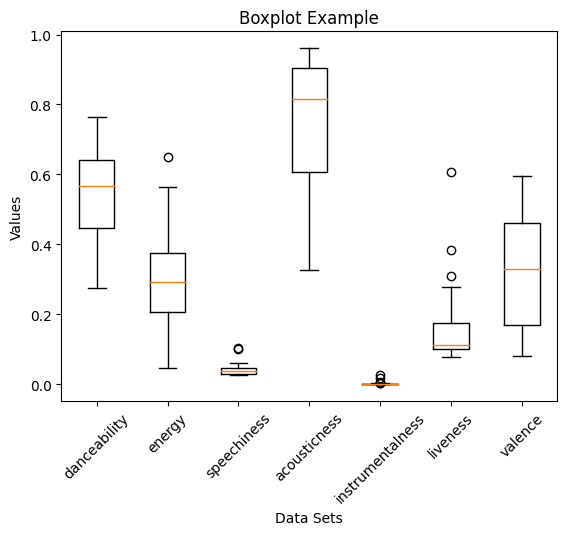

In [208]:
fig, ax = plt.subplots()

# Plot the boxplots
ax.boxplot([danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence])

# Set labels for the plot
ax.set_title('Boxplot Example')
ax.set_xlabel('Data Sets')
ax.set_ylabel('Values')

# Set x-axis tick labels
ax.set_xticklabels(['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'], rotation=45)

# Show the plot
plt.show()

# Feature Guide
#### [0 to 1] danceability
0 is least danceable, 1 is most danceable

#### [0 to 1] energy
represent a perceptual measure of intensity and activity.

#### [-1 to 11] key
key the track is in

#### [-60 to 0db] loudness
the quality of a sound that is primary psychological correlate of physical strength (amplitude)

#### [0 or 1] mode
chord usage, 0 for minor, 1 for major

#### [0 to 1] speechiness
the higher means the more speech is in use in the track.

For example, audiobooks will have 1 in its speechiness. 

x > 0.66			Track is made from spoken words
0.33 > x > 0.66	Track contains both music and speech
x < 0.33			Represent music and other non-speech-like tracks

#### [0 to 1] acousticness 
measure the level of acoustic confidence in the track

#### instrumentalness
higher instrumentalness means no vocal content.

x > 5	Instrumental Tracks

#### [float] liveness
presence of audience in the recording/track. The higher the value means there is a higher probability that the track is taken from a live performance

#### [integer] tempo
BPM Counter

#### [0 to 1] valence
Measure the musical positiveness conveyed by the track.